# Calculating Statistical values using NumPy

In [1]:
# import iris dataset
from sklearn.datasets import load_iris

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set default Seaborn style
sns.set()

# load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['CLASS'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# subset of the data set containing the Iris versicolor petal lengths in units cm 
#versicolor_petal_length = data.
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

### Comparing Percentiles to ECDF

Note:

To ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

In [4]:
# FROM Chapter 1
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

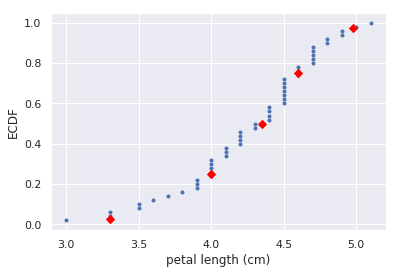

In [5]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

### Box and Whisker Plot

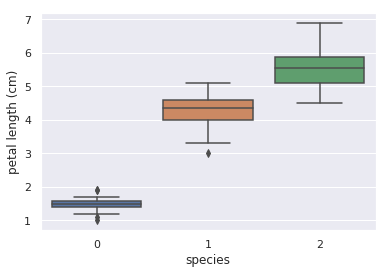

In [6]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='CLASS', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### Variance

Is a measure of the spread of data. It's derived from the mean squared distance of the data from their mean.

![Variance](imgs/variance.png)

Calculate variance, `np.var(data_frame)`

In [9]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
# print(differences)

# Square the differences: diff_sq
diff_sq = differences ** 2
# print(diff_sq)

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


The `standard deviation` is the `square root` of the `variance`, e.g

```py
np.std(data_frame) == np.sqrt(np.var(data_frame))
```

In [10]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


### Covariance and Pearson correlation Coefficient

We can see how two quantities vary together using a `scatter` plot. To create a scatter plot, set the `marker='.'` and `linestyle=none`.

```py
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')
```
![Scatter Plot](imgs/scatter_plot_1.png)

Obama vote = blue, McCain = red. We can see how Obama's vote varies with the total vote count by calculating the `coariance`.

The `covariance` is a measure of how two quanties vary together. 

The `Pearson Correlation` coefficient (covariance/product of the std dev of the x and y variables) varies from `-1` no correlation to `+1` for complete correlation. A value of `0` means there is no correlation in the data(plot in the upper left - the other 3 plots show intermeadiate correlation - negative and positive). The `Pearson Correlation` cofficient is a good metric for determining correlation between two variables.

![Scatter Plot](imgs/scatter_plot_3.png)

We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

In [11]:
versicolor_petal_width = np.array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

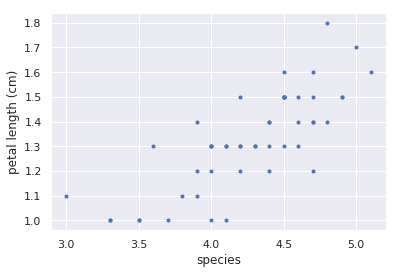

In [12]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')


# Show the result
plt.show()

We see some correlation. Longer petals also tend to be wider.

Consider four scatter plots of x-y data, appearing to the right. Which has, respectively,

- the highest variance in the variable x,
- the highest covariance,
- negative covariance?

![Covariance](imgs/covariance.png)

Answer: d, c, b

The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data x and y, `np.cov(x, y)` returns a 2D array where entries `[0,1]` and `[1,0]` are the covariances. Entry `[0,0]` is the variance of the data in x, and entry `[1,1]` is the variance of the data in y. This 2D output array is called the `covariance matrix`, since it organizes the self- and covariance.

In [13]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


The `Pearson correlation` coefficient, also called the `Pearson r`, is often easier to interpret than the `covariance`. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries `[0,0]` and `[1,1]` are necessarily equal to `1` (can you think about why?), and the value we are after is entry `[0,1]`.

We can write a function, `pearson_r(x, y)` that takes in two arrays and returns the `Pearson correlation` coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

In [15]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result - demonstrates a positive correlation between petal length and width
print(r)

0.7866680885228169
